In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import (
    Input,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D,
    GlobalAveragePooling2D,
    Flatten,
    Dense,
    Dropout
)
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step
Etykieta przykładowego obrazu: [6]


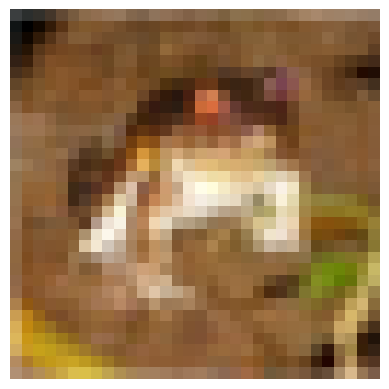

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Etykieta przykładowego obrazu:", y_train[0])
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
input_shape = (32, 32, 3)  

model = Sequential([
    Input(shape=input_shape),
    
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,186 (992.91 KB)

 Trainable params: 253,674 (990.91 KB)

 Non-trainable params: 512 (2.00 KB)

In [13]:
es = EarlyStopping(
    monitor='val_loss', 
    patience=3,     
    min_delta=1e-3,
    mode='min',
    restore_best_weights=True
)
rlp = ReduceLROnPlateau(
    monitor='val_loss',  
    factor=0.5,        
    patience=3,           
    min_delta=1e-5,    
    min_lr=1e-3,          
    mode='min',           
)

history = model.fit(
    x_train,
    y_train_cat,
    batch_size=64,
    epochs=20,
    validation_data=(x_test, y_test_cat),
    callbacks=[es, rlp],
    verbose=1
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.4088 - loss: 1.6292 - val_accuracy: 0.5309 - val_loss: 1.3153 - learning_rate: 1.0000e-04
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.5387 - loss: 1.2819 - val_accuracy: 0.5723 - val_loss: 1.1861 - learning_rate: 1.0000e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5960 - loss: 1.1314 - val_accuracy: 0.5966 - val_loss: 1.1141 - learning_rate: 1.0000e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6309 - loss: 1.0333 - val_accuracy: 0.6375 - val_loss: 1.0248 - learning_rate: 1.0000e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6597 - loss: 0.9602 - val_accuracy: 0.6728 - val_loss: 0.9288 - learning_rate: 1.0000e-04
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6772 - loss: 0.9079 - val_accuracy: 0.6914 - val_loss: 0.8888 - learning_rate: 1.0000e-04
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/ste

In [14]:
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print('Dokładność na zbiorze testowym:', f"{accuracy:.2f}")
print('Strata na zbiorze testowym:', f"{loss:.2f}")

Dokładność na zbiorze testowym: 0.76
Strata na zbiorze testowym: 0.69


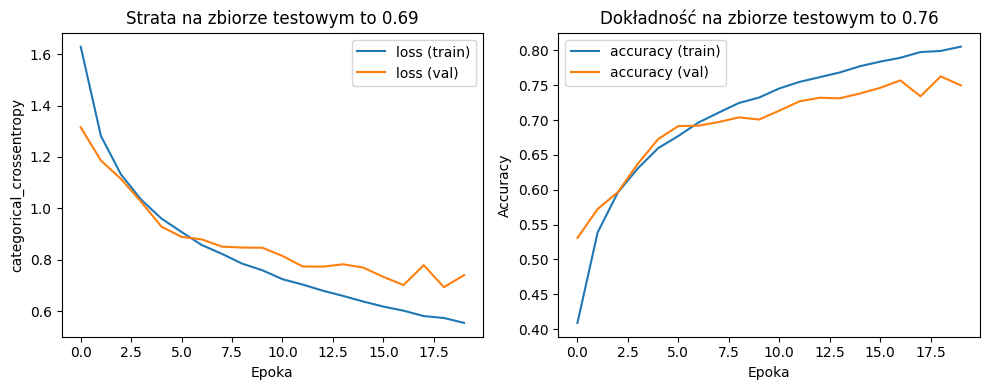

In [15]:
fig_loss_acc = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss (train)')
plt.plot(history.history['val_loss'], label='loss (val)')
plt.xlabel('Epoka')
plt.ylabel('categorical_crossentropy')
plt.title(f'Strata na zbiorze testowym to {loss:.2f}')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='accuracy (train)')
plt.plot(history.history['val_accuracy'], label='accuracy (val)')
plt.xlabel('Epoka')
plt.ylabel('Accuracy')
plt.title(f"Dokładność na zbiorze testowym to {accuracy:.2f}")
plt.legend()
plt.tight_layout()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


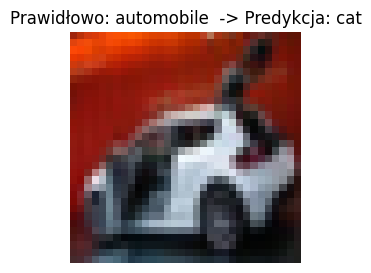

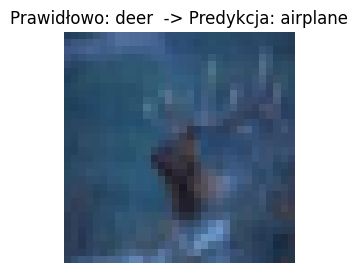

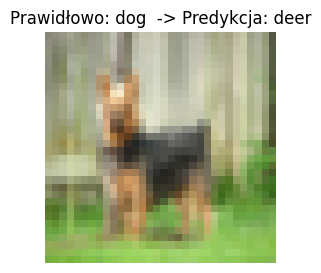

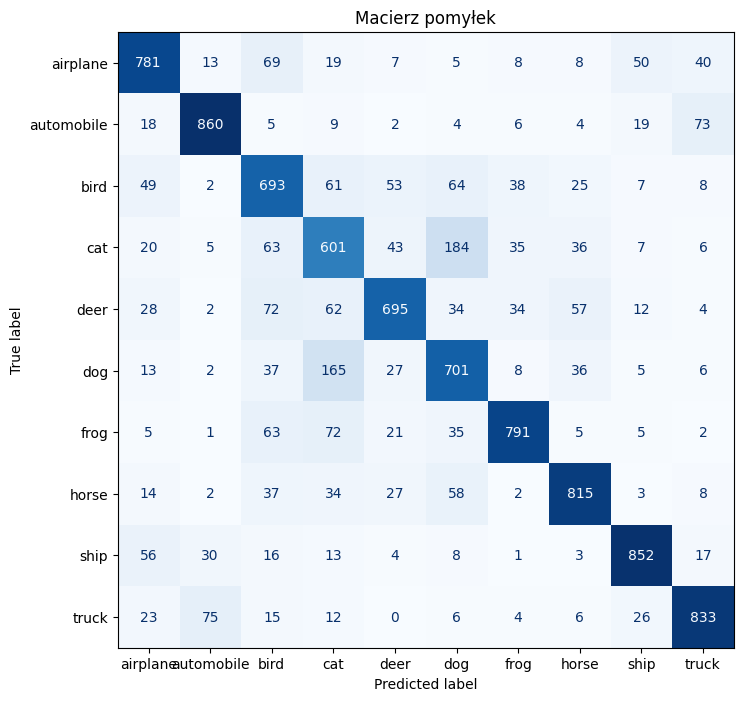

In [10]:
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test_cat, axis=1) 

incorrect_indices = np.nonzero(pred_labels != true_labels)[0]

n_show = min(3, len(incorrect_indices))
for i in range(n_show):
    idx = incorrect_indices[i]
    plt.figure(figsize=(3,3))
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    plt.title(f"Prawidłowo: {class_names[true_labels[idx]]}  -> Predykcja: {class_names[pred_labels[idx]]}")
    plt.axis('off')
    plt.show()

cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig_cm, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('Macierz pomyłek')

plt.show()
